C:\Users\oth08\AppData\Local\Temp\ipykernel_4852\137997271.py:36: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x, y, z, shading='auto', cmap='rainbow')


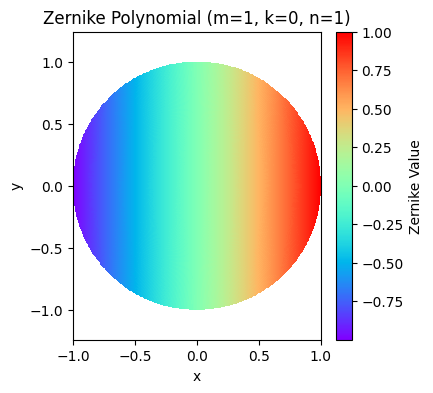

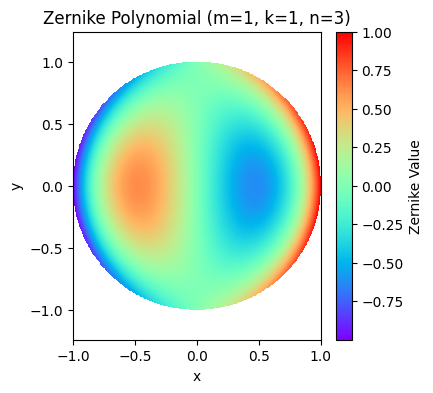

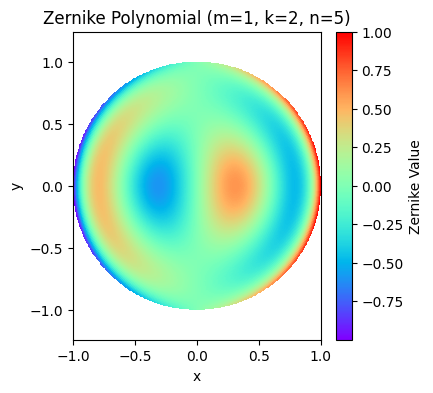

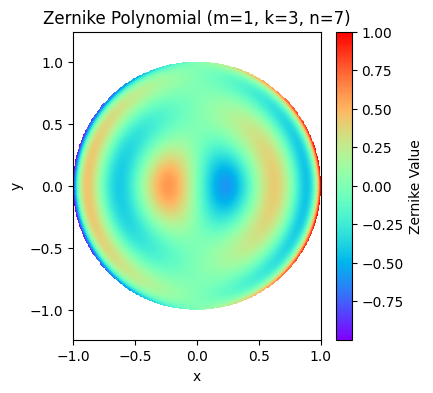

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Zernike radial polynomial
def zernike_radial(n, m, r):
    radial = np.zeros_like(r)
    for s in range((n - m) // 2 + 1):
        c = (-1)**s * factorial(n - s) / (
            factorial(s) * factorial((n + m) // 2 - s) * factorial((n - m) // 2 - s)
        )
        radial += c * r**(n - 2 * s)
    return radial

# Zernike polynomial
def zernike_polynomial(m, k, r, theta):
    n = m + 2 * k  # Calculate n from m + k
    R = zernike_radial(n, m, r)
    if m >= 0:
        return R * np.cos(m * theta)
    else:
        return R * np.sin(abs(m) * theta)

# Plot Zernike polynomial
def plot_zernike(m, k):
    # Define polar coordinates
    theta, r = np.meshgrid(np.linspace(0, 2 * np.pi, 500), np.linspace(0, 1, 500))
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    # Calculate Zernike polynomial
    z = zernike_polynomial(m, k, r, theta)
    
    # Plot
    plt.figure(figsize=(4, 4))
    plt.pcolormesh(x, y, z, shading='auto', cmap='rainbow')
    plt.colorbar(label='Zernike Value')
    plt.title(f"Zernike Polynomial (m={m}, k={k}, n={m + 2*k})")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    plt.show()

# Example: Plot Zernike polynomial with m=1, k=2
plot_zernike(m=1, k=0)
plot_zernike(m=1, k=1)
plot_zernike(m=1, k=2)
plot_zernike(m=1, k=3)
